DATA EXPLORATION

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv(r'loan_approval_dataset.csv')
df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [5]:
print(df.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [6]:
def delete_space(df):
    df.columns = df.columns.str.lstrip()
    return df

In [7]:
df = delete_space(df)
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [8]:
df['loan_status'].value_counts(normalize = True)

loan_status
 Approved    0.62216
 Rejected    0.37784
Name: proportion, dtype: float64

In [9]:
cor = df.corr(numeric_only = True)
cor

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
loan_id,1.000000,0.005326,0.012592,0.008170,0.009809,0.016323,0.020936,0.018595,-0.000862,0.010765
no_of_dependents,0.005326,1.000000,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163
income_annum,0.012592,0.007266,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093
loan_amount,0.008170,-0.003366,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122
loan_term,0.009809,-0.020111,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177
cibil_score,0.016323,-0.009998,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478
residential_assets_value,0.020936,0.007376,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418
commercial_assets_value,0.018595,-0.001531,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576
luxury_assets_value,-0.000862,0.002817,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517
bank_asset_value,0.010765,0.011163,0.851093,0.788122,0.017177,-0.015478,0.527418,0.548576,0.788517,1.000000


DATA VISUALISATION

In [10]:
import plotly.express as px
fig = px.imshow(cor, text_auto = True)
fig.update_layout(height = 800, width = 800)

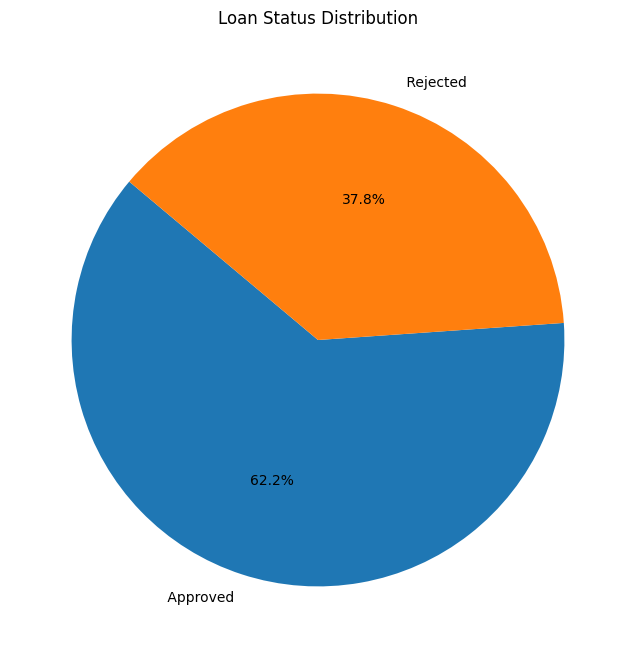

In [11]:
import matplotlib.pyplot as plt

loan_status_counts = df['loan_status'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Loan Status Distribution')

plt.show()

In [12]:
fig1 = px.bar(df.groupby('loan_status')['no_of_dependents'].sum().reset_index(), x = 'loan_status', y = 'no_of_dependents', color = 'loan_status')
fig1.show()

fig2 = px.bar(df.groupby('loan_status')['no_of_dependents'].mean().reset_index(), x = 'loan_status', y = 'no_of_dependents', color = 'loan_status')
fig2.show()

In [13]:
df_cross_no_of_dependents = pd.crosstab(index = df['no_of_dependents'], columns = df['loan_status'])
df_cross_no_of_dependents['total'] = df_cross_no_of_dependents[' Approved'] + df_cross_no_of_dependents[' Rejected']

fig = px.line(df_cross_no_of_dependents, x = df_cross_no_of_dependents.index, y=[' Rejected',' Approved', 'total'])
fig.show()

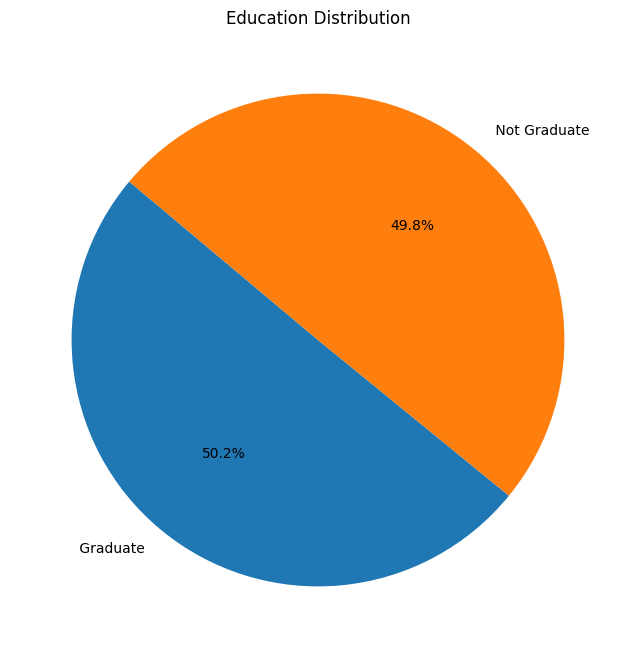

In [14]:
import matplotlib.pyplot as plt

education_counts = df['education'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Education Distribution')

plt.show()


In [15]:
px.bar(df[['education','loan_status']].value_counts().reset_index(name = 'total'), x = 'loan_status', y ='total', color = 'education', barmode = 'group')

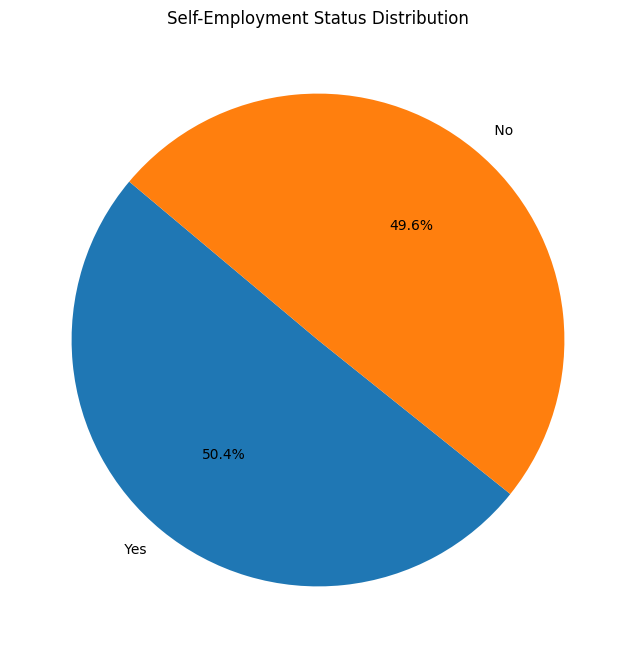

In [16]:
import matplotlib.pyplot as plt

self_employed_counts = df['self_employed'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(self_employed_counts, labels=self_employed_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Self-Employment Status Distribution')

plt.show()


In [17]:
px.bar(df[['self_employed','loan_status']].value_counts().reset_index(name = 'total'), x = 'loan_status', y ='total', color = 'self_employed', barmode = 'group')

In [18]:
fig1 = px.bar(df.groupby('loan_status')['income_annum'].sum().reset_index(), x = 'loan_status', y = 'income_annum', color = 'loan_status')
fig1.show()

fig2 = px.bar(df.groupby('loan_status')['income_annum'].mean().reset_index(), x = 'loan_status', y = 'income_annum', color = 'loan_status')
fig2.show()

In [19]:
px.histogram(df, x = 'loan_amount', color = 'loan_status')

In [20]:
px.box(df, x = 'loan_status', y = 'loan_term', color = 'loan_status')

In [21]:
df_cross_loan_term = pd.crosstab(index = df['loan_term'], columns = df['loan_status'])
df_cross_loan_term['total'] = df_cross_loan_term[' Approved'] + df_cross_loan_term[' Rejected']

fig = px.line(df_cross_loan_term, x = df_cross_loan_term.index, y=[' Rejected',' Approved', 'total'])
fig.show()

In [22]:
px.scatter(df, x = 'loan_term', color = 'loan_status', y = 'loan_amount')

In [23]:
fig1 = px.bar(df.groupby('loan_status')['cibil_score'].sum().reset_index(), x = 'loan_status', y = 'cibil_score', color = 'loan_status')
fig1.show()

fig2 = px.bar(df.groupby('loan_status')['cibil_score'].mean().reset_index(), x = 'loan_status', y = 'cibil_score', color = 'loan_status')
fig2.show()

In [24]:
px.scatter(df, x = 'cibil_score', y = 'loan_amount', color = 'loan_status')

In [25]:
fig1 = px.scatter(df, x = 'residential_assets_value', y = 'loan_amount', color = 'loan_status')
fig1.show()

fig2 = px.scatter(df, x = 'commercial_assets_value', y = 'loan_amount', color = 'loan_status')
fig2.show()

fig3 = px.scatter(df, x = 'luxury_assets_value', y = 'loan_amount', color = 'loan_status')
fig3.show()

fig4 = px.scatter(df, x = 'bank_asset_value', y = 'loan_amount', color = 'loan_status')
fig4.show()

fig5 = px.scatter(df, x = 'income_annum', y = 'loan_amount', color = 'loan_status')
fig5.show()

In [26]:
fig1 = px.histogram(df, x = 'residential_assets_value', color = 'loan_status')
fig1.show()

fig2 = px.histogram(df, x = 'commercial_assets_value', color = 'loan_status')
fig2.show()

fig3 = px.histogram(df, x = 'luxury_assets_value', color = 'loan_status')
fig3.show()

fig4 = px.histogram(df, x = 'bank_asset_value', color = 'loan_status')
fig4.show()

fig5 = px.histogram(df, x = 'income_annum', color = 'loan_status')
fig5.show()

DATA PREPROCESSING

In [27]:
df = pd.get_dummies(df, columns=['education','self_employed'])

In [28]:
df.head()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,True,False,True,False
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,False,True,False,True
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,True,False,True,False
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,True,False,True,False
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,False,True,False,True


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   income_annum              4269 non-null   int64 
 3   loan_amount               4269 non-null   int64 
 4   loan_term                 4269 non-null   int64 
 5   cibil_score               4269 non-null   int64 
 6   residential_assets_value  4269 non-null   int64 
 7   commercial_assets_value   4269 non-null   int64 
 8   luxury_assets_value       4269 non-null   int64 
 9   bank_asset_value          4269 non-null   int64 
 10  loan_status               4269 non-null   object
 11  education_ Graduate       4269 non-null   bool  
 12  education_ Not Graduate   4269 non-null   bool  
 13  self_employed_ No         4269 non-null   bool  
 14  self_employed_ Yes      

In [30]:
if 'loan_status' in df.columns:
    X = df.drop('loan_status', axis=1)
    y = df['loan_status']
else:
    print("'loan_status' column not found in the DataFrame.")


In [31]:
df.head()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,True,False,True,False
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,False,True,False,True
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,True,False,True,False
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,True,False,True,False
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,False,True,False,True


In [32]:
print(df.columns)

Index(['loan_id', 'no_of_dependents', 'income_annum', 'loan_amount',
       'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status', 'education_ Graduate', 'education_ Not Graduate',
       'self_employed_ No', 'self_employed_ Yes'],
      dtype='object')


In [33]:
df.columns = df.columns.str.strip()

DATA SPLITTING

In [34]:
from sklearn.model_selection import train_test_split

X = df.drop('loan_status', axis=1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

CHOOSING & TRAINING MODEL

Random Forest Approach

In [35]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

MODEL EVALUATION

In [36]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy * 100}")
print("classification Report:\n",classification_rep)
print("Confussion Matrix\n", conf_mat)

Accuracy: 97.89227166276346
classification Report:
               precision    recall  f1-score   support

    Approved       0.98      0.98      0.98       536
    Rejected       0.97      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Confussion Matrix
 [[527   9]
 [  9 309]]


Decision Tree Approach

In [37]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)

MODEL EVALUATION

In [38]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

accuracy_dtree = accuracy_score(y_test, y_pred_decision_tree)
classification_rep_dtree = classification_report(y_test,y_pred_decision_tree)
conf_mat_dtree = confusion_matrix(y_test,y_pred_decision_tree)

print("Decision Tree model:")
print(f"Accuracy : {accuracy_dtree * 100}")
print("classification Report:",classification_rep_dtree)
print("confusion Matrix",conf_mat_dtree)

Decision Tree model:
Accuracy : 97.54098360655738
classification Report:               precision    recall  f1-score   support

    Approved       0.98      0.98      0.98       536
    Rejected       0.97      0.96      0.97       318

    accuracy                           0.98       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854

confusion Matrix [[527   9]
 [ 12 306]]


Logistic Regression Approach

In [39]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train,y_train)
y_pred_log_reg_model = log_reg_model.predict(X_test)

MODEL EVALUATION

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_log_reg = accuracy_score(y_test,y_pred_log_reg_model)
conf_mat_log_reg = confusion_matrix(y_test, y_pred_log_reg_model)
classification_rep_log_reg = classification_report(y_test,y_pred_log_reg_model)

print("Logistic Regression Model")
print(f"Accuracy:{accuracy_log_reg * 100}")
print("classification Report:",classification_rep_log_reg)
print("Confusion Matrix:",conf_mat_log_reg)

Logistic Regression Model
Accuracy:63.70023419203748
classification Report:               precision    recall  f1-score   support

    Approved       0.64      0.95      0.77       536
    Rejected       0.57      0.11      0.18       318

    accuracy                           0.64       854
   macro avg       0.60      0.53      0.47       854
weighted avg       0.61      0.64      0.55       854

Confusion Matrix: [[510  26]
 [284  34]]


SVM Approach

In [41]:
from sklearn.svm import SVC

svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

MODEL EVALUATION

In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Accuracy_svc = accuracy_score(y_test,y_pred_svc)
classification_rep_svc = classification_report(y_test,y_pred_svc)
confusion_matrix_svc = confusion_matrix(y_test,y_pred_svc)

print("Confusion Matrix")
print(f"Accuracy : {Accuracy_svc * 100}")
print("classification Report:",classification_rep_svc)
print("Confusion Matrix:",confusion_matrix_svc)

Confusion Matrix
Accuracy : 62.76346604215457
classification Report:               precision    recall  f1-score   support

    Approved       0.63      1.00      0.77       536
    Rejected       0.00      0.00      0.00       318

    accuracy                           0.63       854
   macro avg       0.31      0.50      0.39       854
weighted avg       0.39      0.63      0.48       854

Confusion Matrix: [[536   0]
 [318   0]]


C:\Users\Sinan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Sinan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Sinan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no pr